In [8]:
import numpy as np
import matplotlib.pyplot as plt

We generate latent positions following a dirichlet distribution such that we can get valid RDPGs.

Note that we have $n$ $X_i$s and each $X_i \in \mathbb{R}^K$.

$$[X]^{n,k} = X_1, \dots, X_n \overset{iid}{\sim} Dir(\alpha)$$
Where
$$\alpha = [\alpha_1, \dots, \alpha_K]$$
$$\alpha_0 = \sum_{j=1}^K \alpha_j,$$
The marginal distributions are Beta distributions
$$X_{ij} \sim Beta(\alpha_j, \alpha_0-\alpha_j)$$
$$E[X_{ij}] = \frac{\alpha_j}{\alpha_0}, Var[X_j] = \frac{\alpha_j(\alpha_0-\alpha_j)}{\alpha_0^2(\alpha_0+1)}.$$

In [128]:
def gen_alpha_uniform(k):
    '''
    Generates values alpha_1, ..., alpha_k which sum to 1 from a uniform
    '''
    alpha = np.random.uniform(0,1,k) # generate uniform alphas
    alpha /= np.sum(alpha) # should sum to 1
    return alpha

def gen_x_dirichlet_alpha(n, alpha):
    '''
    Creates n Xi's from a set of alpha parameters
    '''
    X = np.random.dirichlet(alpha, n)
    return X

def gen_x_dirichlet(n,k):
    '''
    Creates n Xi's each of dimension K, iid from a Dir(alpha)
    '''
    alpha = gen_alpha_uniform(k)
    X = np.random.dirichlet(alpha, n)
    return X

def create_RDPG(X):
    '''
    Creates RDPG matrix from a set of latent positions
    '''
    rdpg = np.dot(X,X.T)
    return rdpg

def create_adj(rdpg):
    '''
    Samples an adjacency matrix from an RDPG
    '''
    A = np.random.binomial(1,rdpg)
    return A

In [129]:
def adj(X):
    '''
    Samples adjacency matrix of RDPG from a set of latent positions
    '''
    rdpg = create_RDPG(X)
    A = create_adj(rdpg)
    return A

In [130]:
alpha = gen_alpha_uniform(10) # 5-dimensional alpha
X = gen_x_dirichlet_alpha(1000, alpha) # generated latent positions of shape (100,5) 

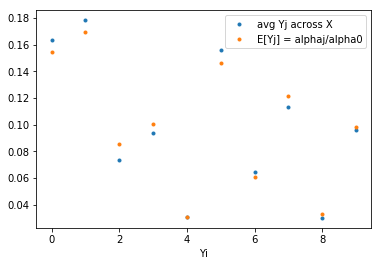

In [132]:
plt.plot(np.mean(X, axis=0), '.', label='avg Yj across X')
plt.plot(alpha, '.', label='E[Yj] = alphaj/alpha0')
plt.xlabel('Yi')
plt.legend(loc=0)
plt.show()